# 导入必要的的包

In [1]:
import pandas as pd
import numpy as np
import re 
import jieba
import matplotlib.pyplot as plt
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


# 读入数据

In [15]:
df = pd.read_excel('text_analysis_weibo_sample.xlsx', index_col=0)

In [3]:
df.head()

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东


# 文本分词 + 去除非中文字符

In [25]:
def clean_text(text):
    """
    清洗文本，去除非中文字符，且使用jieba进行分词，保留长度为2以上的词
    """
    text = re.sub(r'[^\u4e00-\u9FA5]+', '', text)
    words = jieba.lcut(text)
    words = [word for word in words if len(word) >= 2]
    return ' '.join(words)

print(clean_text('我喜欢,,,,,吃苹果!!!!'))

喜欢 苹果


In [13]:
df['标题/微博内容'].apply(clean_text)[:10]

0    国债 地产 行业 重磅 利好 提振 风险 偏好 期债 低开 低 走 国债 期货 全线 收跌 ...
1                                        喜迎 二十大 忠诚 保平安
2    注意 事关 明日 教资 考试 福建省 教育 考试院 发布 补充 公告 福建省 年 下半年 全...
3    近日 千年 大计 雄安 新区 迎来 五周岁 生日 从 一张白纸 到 塔吊 林立 雄安 新区 ...
4                                              樊振东 牛 逼
5                              德州 同城会 虽 不能 至 心向往之 左 哼哼
6           严惩 弄虚作假 玩弄 全国 网民 的 罪犯 们 克克 丨 你们 真 厉害 两个 词条
7                                                   关注
8    笑 死 我 了 我 怎么 才 看到 这条 啊 哈哈哈哈 哈哈哈哈 哈哈哈 许昕 在 这个 团...
9    截至 目前 除 南京 东莞 外 已有 个 万亿 俱乐部 城市 晒出 上半年 成绩单 排位 变...
Name: 标题/微博内容, dtype: object

In [26]:
# 运用自定义函数，并将预处理、分词结果存放至df的‘分词’字段中
df['分词'] = df['标题/微博内容'].apply(clean_text)
df['分词'] = df['分词'].apply(lambda x: x.split())
df['分词'].head(10)

0    [国债, 地产, 行业, 重磅, 利好, 提振, 风险, 偏好, 期债, 低开, 国债, 期...
1                                   [喜迎, 二十大, 忠诚, 保平安]
2    [注意, 事关, 明日, 教资, 考试, 福建省, 教育, 考试院, 发布, 补充, 公告,...
3    [近日, 千年, 大计, 雄安, 新区, 迎来, 五周岁, 生日, 一张白纸, 塔吊, 林立...
4                                                [樊振东]
5                              [德州, 同城会, 不能, 心向往之, 哼哼]
6       [严惩, 弄虚作假, 玩弄, 全国, 网民, 罪犯, 克克, 你们, 厉害, 两个, 词条]
7                                                 [关注]
8    [怎么, 看到, 这条, 哈哈哈哈, 哈哈哈哈, 哈哈哈, 许昕, 这个, 团队, 半天, ...
9    [截至, 目前, 南京, 东莞, 已有, 万亿, 俱乐部, 城市, 晒出, 上半年, 成绩单...
Name: 分词, dtype: object

# 构造LDA模型

In [19]:
import gensim

In [30]:
dictionary = corpora.Dictionary(df['分词'])
corpus = [dictionary.doc2bow(text) for text in df['分词']]

In [ ]:
# 训练模型
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [ ]:
# 看主题内容
topic = lda_model.print_topics(num_topics=5, num_words=10)

In [33]:
topic

[(0,
  '0.006*"报告" + 0.006*"公司" + 0.006*"亿元" + 0.005*"增长" + 0.005*"银行" + 0.005*"考试" + 0.005*"重庆" + 0.005*"考生" + 0.004*"玉米" + 0.004*"产品"'),
 (1,
  '0.014*"万吨" + 0.012*"市场" + 0.008*"库存" + 0.006*"电子" + 0.006*"下降" + 0.006*"需求" + 0.006*"预期" + 0.006*"价格" + 0.006*"环比" + 0.006*"现货"'),
 (2,
  '0.011*"郑州" + 0.010*"数字" + 0.009*"建设" + 0.008*"城市" + 0.006*"发展" + 0.006*"考生" + 0.005*"亿元" + 0.005*"网络" + 0.005*"考场" + 0.005*"经济"'),
 (3,
  '0.013*"中国" + 0.012*"经济" + 0.008*"加息" + 0.006*"通胀" + 0.006*"欧洲央行" + 0.005*"全球" + 0.005*"英国" + 0.005*"增长" + 0.005*"美元" + 0.005*"世界"'),
 (4,
  '0.010*"开户" + 0.009*"期货" + 0.006*"我们" + 0.006*"原油" + 0.004*"黄金" + 0.004*"公司" + 0.004*"自己" + 0.004*"附近" + 0.004*"关注" + 0.004*"市场"')]

In [35]:
def infer_topics(model, document):
    """
    对文本进行主题推断

    Args:
        model: 训练好的LDA模型
        dictionary: 需要推断的文档

    Returns:
        每个文本的主题分布列表
    """
    # 将文本转换为BoW格式
    bow = dictionary.doc2bow(document)
    topics = lda_model.get_document_topics(bow)
    return topics

documents = df['分词'].values.tolist()
for i, doc in enumerate(documents[:10]):
    print(f"Document {i}: {doc}")
    doc_topics = infer_topics(lda_model, doc)
    print(f"Topics: {doc_topics}")
    print("\n")

Document 0: ['国债', '地产', '行业', '重磅', '利好', '提振', '风险', '偏好', '期债', '低开', '国债', '期货', '全线', '收跌', '年期', '主力', '合约', '年期', '主力', '合约', '年期', '主力', '合约', '跌三大', '主力', '合约', '一年', '收盘', '新低', '行情', '解读', '公开市场', '方面', '央行', '开展', '亿元', '天期', '回购', '操作', '中标', '利率', '亿元', '回购', '到期', '因此', '当日', '投放', '亿元', '资金面', '方面', '央行', '公开市场', '回购', '继续', '加力', '不过', '银行', '市场', '周二', '资金', '供给', '趋于', '收敛', '七天', '回购', '加权', '利率', '进一步', '上行', '长期', '资金', '方面', '全国', '主要', '股份制', '银行', '一年期', '同业', '存单', '报价', '维持', '水平', '不过', '目前', '尚无', '成交量', '配合', '房地产', '行业', '再度', '迎来', '重磅', '利好', '证监会', '宣布', '涉房', '企业', '股权', '融资', '方面', '调整', '优化', '五项', '措施', '自即日起', '施行', '随着', '证监会', '支持', '房企', '股权', '融资', '第三支', '正式', '发射', '信贷', '债券', '股权', '三个', '融资', '渠道', '三箭', '齐发', '合力', '推动', '房地产', '融资', '第三支', '快速', '落地', '房地产', '行业', '注入', '大规模', '增量', '资金', '资产', '促进', '行业', '平稳', '健康', '发展', '短短', '时间', '政策', '端三箭', '齐发', '强势', '托底', '提振', '各方', '信心', '看好', '行业', '信用', '复苏', '以及', '因城', '施策', '空间', '逐步', 

# 可视化

In [39]:
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
display(pyLDAvis.display(lda_vis))

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# 静态可视化（我不知道为什么ipynb显示不出来）
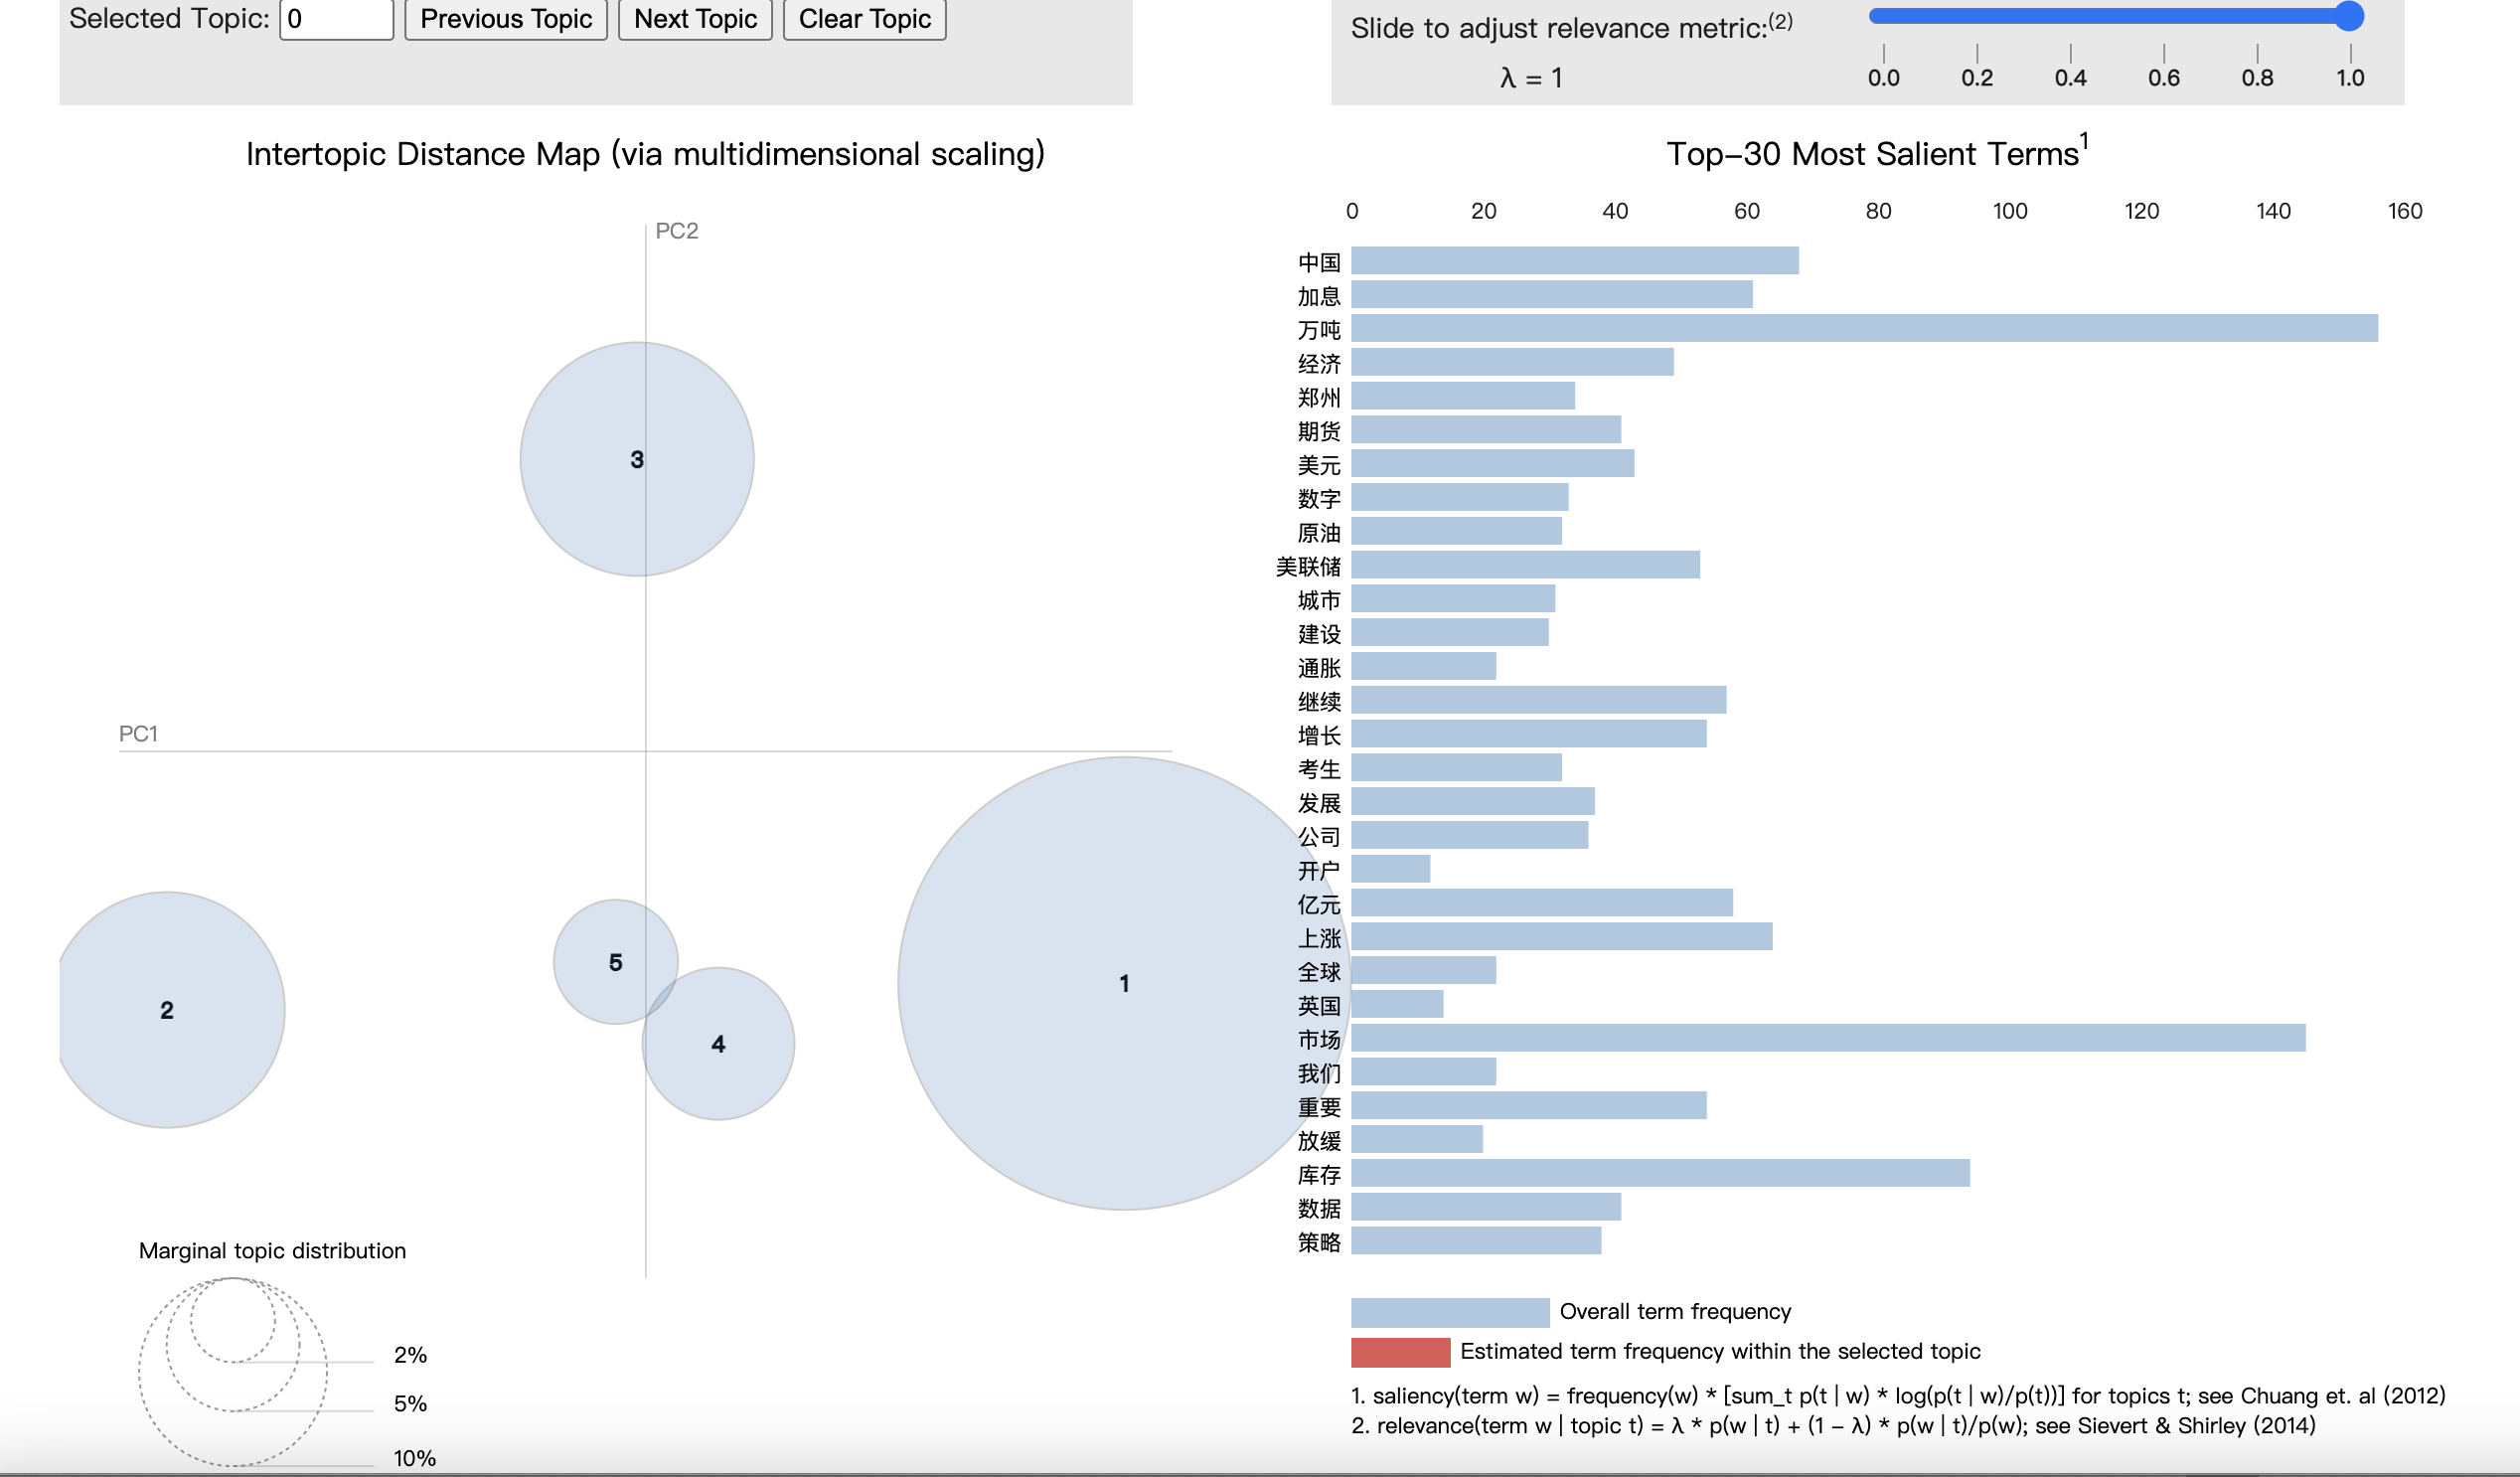

